# <b><p style="background-color: #ff6200; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Task 28-> Exploring Cross-Validation, Overfitting, and Underfitting</p>

# Tasks: 
1. [Cross-validation](#1)
    -  [K-Fold Cross-Validation](#01)
    -  [Stratified K-Fold Cross-Validation](#02)
    -  [Leave-One-Out Cross-Validation (LOOCV)](#03)
3. [OverFitting](#2)
4. [UnderFitting](#3)

## <b><span style='color:#ff6200'> Importing Libraries</span>

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## <b><span style='color:#ff6200'> Load and Preprocessing of Data</span>

In [16]:
social = pd.read_csv("Social_Network_Ads.csv", usecols=lambda column: column != 'User ID')
social['Gender'] = social['Gender'].map({'Male': 0, 'Female': 1})
social.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = social[['Age', 'EstimatedSalary']]
y = social['Purchased']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape, y.shape

((400, 2), (400,))

<a id=1></a>
# <b><span style='color:#ff6200'> Cross-validation</span>

Cross-validation is a statistical method used to estimate the performance and generalization ability of machine learning models. It involves partitioning the data into multiple subsets (folds), training the model on some of these subsets (training set), and evaluating it on the remaining subsets (validation set). This process is repeated multiple times with different partitions to ensure the model's performance is consistent and not dependent on specific data splits. Cross-validation is mainly used in predictive settings to estimate how accurately a model will perform in practice, providing a more robust assessment of the model's ability to generalize to unseen data.
## Purpose
The main goal of cross-validation is to assess the model’s ability to generalize to unseen data. This is achieved by partitioning the data into multiple subsets (folds), training the model on some of these subsets (training set), and evaluating it on the remaining subsets (validation set). By repeating this process multiple times with different partitions, cross-validation provides a more robust measure of the model's performance.

## Key Benefits
- **Improved Model Assessment:** Cross-validation provides a more accurate estimate of a model's performance compared to a single train-test split.
- **Detection of Overfitting:** It helps in identifying models that generalize well versus those that might be overfitting to the training data.
- **Model Selection:** Assists in selecting the best model by comparing the performance of different models using the same cross-validation procedure.
- **Hyperparameter Tuning:** Helps in optimizing hyperparameters by providing a reliable performance measure for each set of hyperparameters.

## Types
1. K-Fold Cross-Validation
2. Stratified K-Fold Cross-Validation
3. Leave-One-Out Cross-Validation (LOOCV)

<a id=01></a>
## <span style='color:#fcc36d'> K-Fold Cross-Validation </span>

K-Fold Cross-Validation
In K-Fold cross-validation, the dataset is randomly divided into 𝑘 equally (or nearly equally) sized folds. The model is trained 𝑘 times, each time using 𝑘−1 folds for training and the remaining fold for testing. The performance measure reported by K-Fold cross-validation is the average of the values computed in the loop.

### Advantages:
- Provides a good balance between bias and variance.
- Suitable for a wide range of datasets and problems.
### Disadvantages:
- Computationally expensive for large datasets as the model is trained and evaluated 𝑘 times.

In [18]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)
model = LogisticRegression(max_iter=200)
accuracies = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print(f'K-Fold Cross-Validation Accuracies: {accuracies}')

average_accuracy = sum(accuracies) / len(accuracies)
print(f'Average Accuracy: {average_accuracy}')

K-Fold Cross-Validation Accuracies: [0.6875, 0.6625, 0.7125, 0.55, 0.6]
Average Accuracy: 0.6425


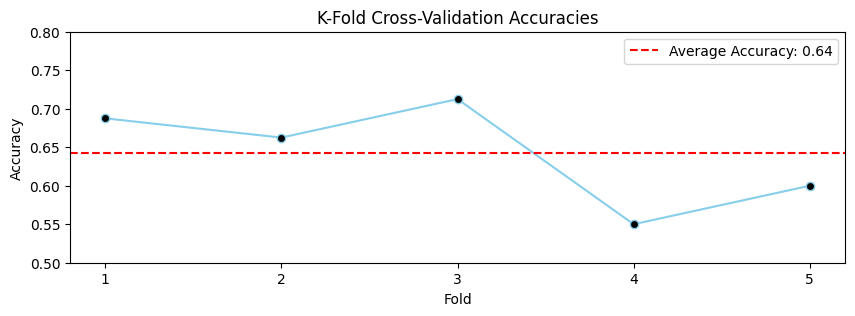

In [19]:
plt.figure(figsize=(10, 3))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='skyblue', markerfacecolor='black')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('K-Fold Cross-Validation Accuracies')
plt.xticks(range(1, len(accuracies) + 1))
plt.ylim(0.5, 0.8)
plt.axhline(y=average_accuracy, color='r', linestyle='--', label=f'Average Accuracy: {average_accuracy:.2f}')
plt.legend()
plt.show()

<a id=02></a>
## <span style='color:#fcc36d'> Stratified K-Fold Cross-Validation </span>

Stratified K-Fold cross-validation is a variation of K-Fold that ensures each fold has approximately the same percentage of samples of each target class as the original dataset. This is particularly useful for imbalanced datasets.

## Advantages:

- Ensures each fold is representative of the overall class distribution.
- Reduces variance in performance estimates for imbalanced datasets.
## Disadvantages:

- Slightly more complex to implement compared to standard K-Fold.

In [20]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True)
model = LogisticRegression(max_iter=200)

accuracies = []

for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print(f'Stratified K-Fold Cross-Validation Accuracies: {accuracies}')

average_accuracy = sum(accuracies) / len(accuracies)
print(f'Average Accuracy: {average_accuracy}')

Stratified K-Fold Cross-Validation Accuracies: [0.65, 0.65, 0.6375, 0.6375, 0.6375]
Average Accuracy: 0.6425000000000001


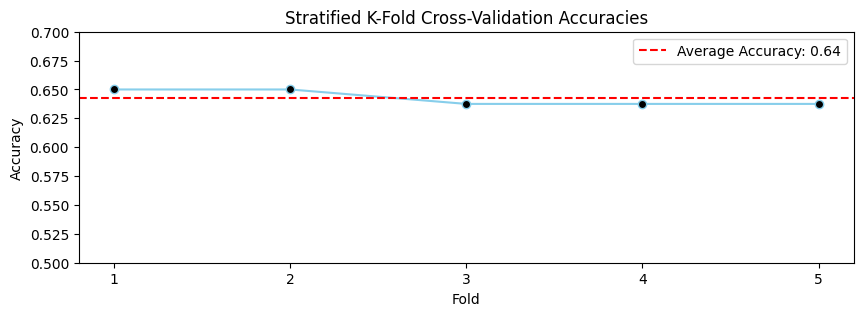

In [21]:
plt.figure(figsize=(10, 3))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='skyblue', markerfacecolor='black')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Stratified K-Fold Cross-Validation Accuracies')
plt.xticks(range(1, len(accuracies) + 1))
plt.ylim(0.5, 0.7)
plt.axhline(y=average_accuracy, color='r', linestyle='--', label=f'Average Accuracy: {average_accuracy:.2f}')
plt.legend()
plt.show()

<a id=03></a>
## <span style='color:#fcc36d'> Leave-One-Out Cross-Validation (LOOCV) </span>

In LOOCV, each training set consists of all samples except one, and the model is tested on that single sample. This process is repeated such that each sample in the dataset is used exactly once as a test set.

## Advantages:

- Utilizes the maximum amount of data for training in each iteration.
- Provides an unbiased estimate of model performance.
## Disadvantages:

- Extremely computationally expensive for large datasets.
- High variance in performance estimates since each test set contains only one sample.

In [22]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
model = LogisticRegression(max_iter=200)

accuracies = []

for train_index, test_index in loo.split(X_scaled):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print(f'Leave-One-Out Cross-Validation Accuracies: {accuracies[:20]}...')  

average_accuracy = sum(accuracies) / len(accuracies)
print(f'Average Accuracy: {average_accuracy}')

Leave-One-Out Cross-Validation Accuracies: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]...
Average Accuracy: 0.6425


<a id=2></a>
# <b><span style='color:#ff6200'> Overfitting</span>

Overfitting is a common issue in machine learning where a model learns the details and noise in the training data to such an extent that it performs well on the training data but poorly on new, unseen data. This occurs when the model is excessively complex, such as having too many parameters relative to the number of observations. Overfitting results in a model that captures the idiosyncrasies of the training data rather than the underlying distribution of the data.

## Characteristics of Overfitting
- High Training Accuracy, Low Test Accuracy: The model shows excellent performance on the training data but fails to generalize to the validation or test data.
- Complex Models: Models with too many parameters can fit the noise in the training data rather than the actual signal.
- Large Variance: Overfitted models have high variance, meaning their performance varies greatly with different subsets of the data.

## Detecting Overfitting
- Cross-Validation: Using techniques like k-fold cross-validation can help detect overfitting by evaluating the model’s performance on different subsets of the data.
- Learning Curves: Plotting training and validation error as a function of training iterations can reveal overfitting. A large gap between the training and validation errors indicates overfitting.
- Performance Metrics: Comparing metrics like accuracy, precision, recall, and F1-score on training and test sets can help identify overfitting.

## Preventing and Mitigating Overfitting
- Simpler Models: Using models with fewer parameters can reduce the risk of overfitting.
- Regularization: Techniques like L1 and L2 regularization add a penalty for large coefficients, discouraging the model from fitting the noise in the data.
- L1 Regularization (Lasso): Adds a penalty equal to the absolute value of the magnitude of coefficients.
- L2 Regularization (Ridge): Adds a penalty equal to the square of the magnitude of coefficients.
- Pruning: In decision trees, pruning techniques can be used to remove branches that have little importance.
- Early Stopping: In iterative training processes like gradient descent, training can be halted when the performance on a validation set starts to degrade.
- Data Augmentation: Increasing the amount of training data by augmenting existing data can help the model generalize better.
- Cross-Validation: Ensuring that cross-validation is performed correctly to give a better estimate of the model's performance.
- Dropout: In neural networks, dropout is a regularization technique where randomly selected neurons are ignored during training. This prevents the model from becoming too reliant on specific neurons.
- Bagging and Boosting: Ensemble methods like bagging and boosting can help reduce overfitting by combining the predictions of multiple models.

In [23]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

overfit_model = DecisionTreeRegressor(max_depth=20, random_state=42)
overfit_model.fit(X_train, y_train)

y_train_pred = overfit_model.predict(X_train)
y_test_pred = overfit_model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f'Mean Absolute Error on Training Set: {mae_train:.2f}')
print(f'Mean Absolute Error on Test Set: {mae_test:.2f}')

cv_scores = cross_val_score(overfit_model, X, y, cv=10, scoring='neg_mean_absolute_error')
cv_scores = -cv_scores 

print(f'Cross-Validation Scores (MAE): {cv_scores}')
print(f'Average Cross-Validation Score (MAE): {np.mean(cv_scores):.2f}')

Mean Absolute Error on Training Set: 0.00
Mean Absolute Error on Test Set: 0.16
Cross-Validation Scores (MAE): [0.15   0.1    0.0375 0.     0.075  0.3    0.15   0.25   0.1625 0.2375]
Average Cross-Validation Score (MAE): 0.15


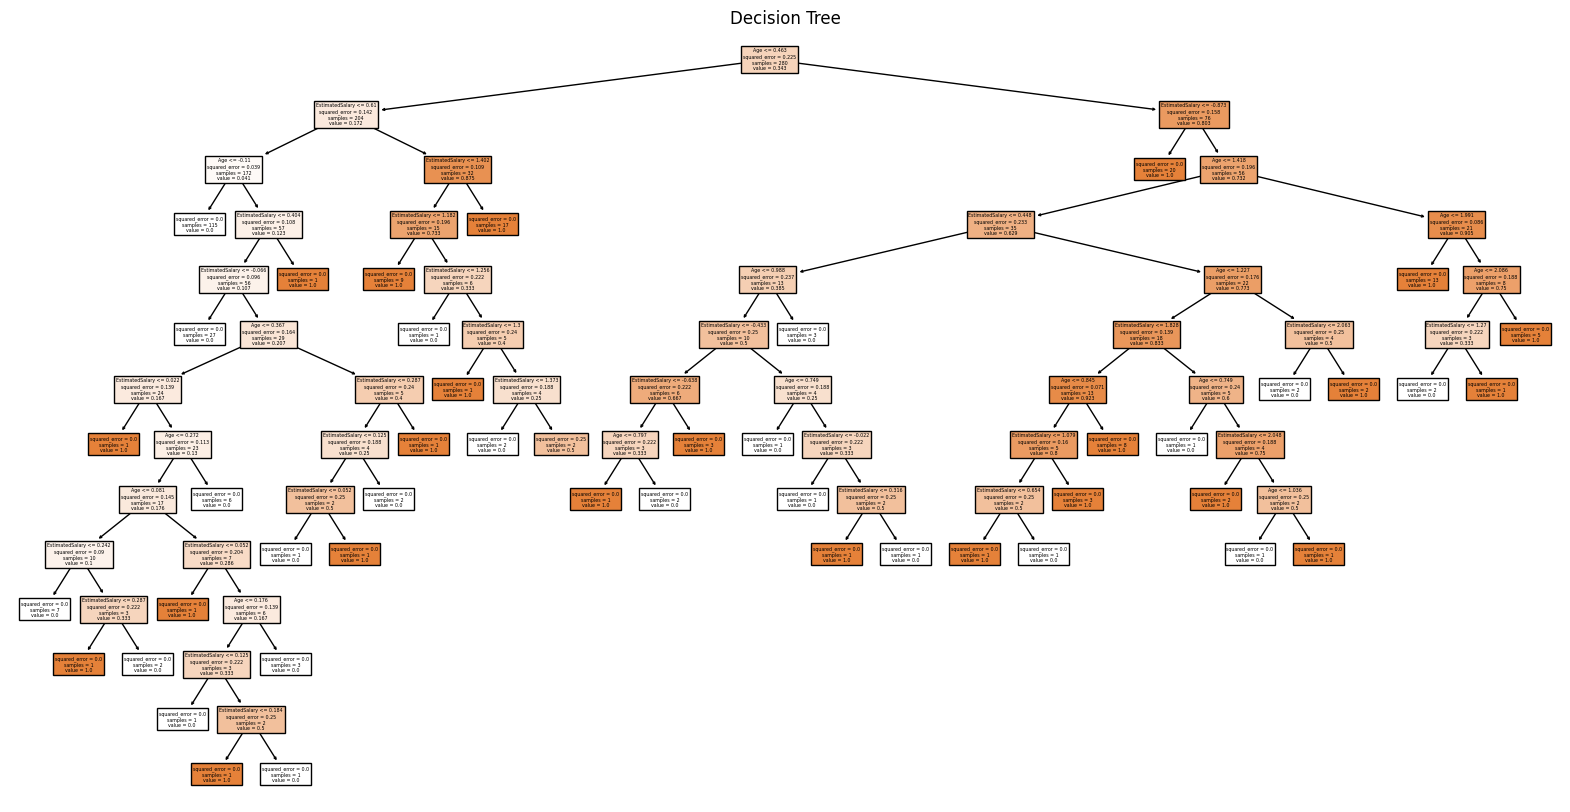

In [24]:
plt.figure(figsize=(20,10))
plot_tree(overfit_model, filled=True, feature_names=['Age', 'EstimatedSalary'], class_names=['Not Purchased', 'Purchased'])
plt.title("Decision Tree")
plt.show()

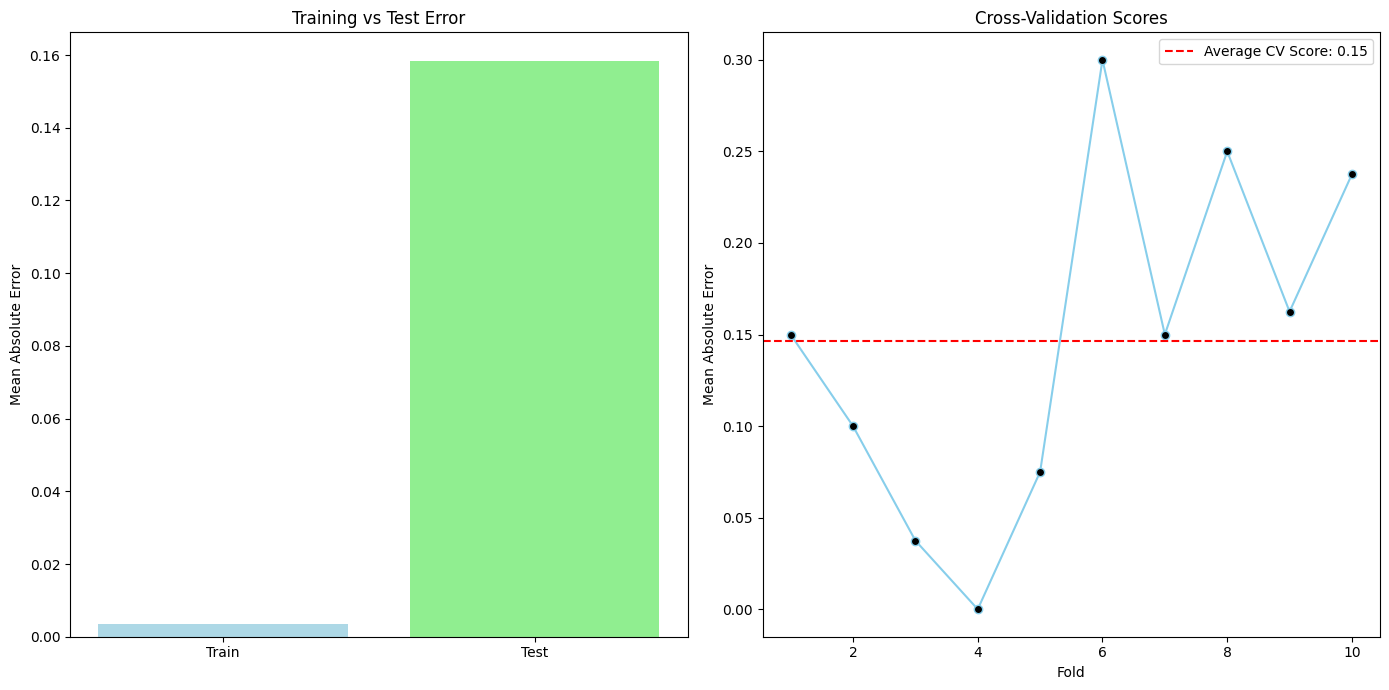

In [25]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.bar(['Train', 'Test'], [mae_train, mae_test], color=['lightblue', 'lightgreen'])
plt.ylabel('Mean Absolute Error')
plt.title('Training vs Test Error')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='skyblue', markerfacecolor='black')
plt.xlabel('Fold')
plt.ylabel('Mean Absolute Error')
plt.title('Cross-Validation Scores')
plt.axhline(y=np.mean(cv_scores), color='r', linestyle='--', label=f'Average CV Score: {np.mean(cv_scores):.2f}')
plt.legend()

plt.tight_layout()
plt.show()

<a id=3></a>
# <b><span style='color:#ff6200'> Underfitting</span>

Underfitting is the opposite of overfitting. It occurs when a machine learning model is too simple to capture the underlying patterns of the data, resulting in poor performance on both the training data and new, unseen data. Underfitting indicates that the model has not learned enough from the data and thus has limited predictive power.

## Characteristics of Underfitting
- Low Training Accuracy: The model performs poorly even on the training data.
- High Bias: The model makes strong assumptions about the data and fails to capture its complexity.
- Poor Generalization: The model cannot generalize well to new data, often resulting in high error rates.

## Causes of Underfitting
- Model Complexity: Using a model that is too simple relative to the complexity of the data (e.g., using a linear model for a problem that requires a more complex, non-linear model).
- Insufficient Training Time: Training the model for too few epochs or iterations can prevent it from learning the underlying patterns.
- Inadequate Features: Not including enough relevant features or using features that do not adequately represent the underlying problem.
- Incorrect Hyperparameters: Choosing suboptimal hyperparameters that limit the model’s capacity to learn from the data.

## Detecting Underfitting
- Learning Curves: Plotting training and validation error as a function of training iterations can reveal underfitting. If both errors are high and decrease slowly, the model is likely underfitting.
- Performance Metrics: Evaluating metrics such as accuracy, precision, recall, and F1-score on the training set. Low performance on the training set indicates underfitting.
- Residual Plots: In regression tasks, plotting the residuals (differences between observed and predicted values) can help identify underfitting. Large, consistent residuals suggest that the model is too simple.


In [26]:
underfit_model = DecisionTreeRegressor(max_depth=2, random_state=42)
underfit_model.fit(X_train, y_train)

y_train_pred = underfit_model.predict(X_train)
y_test_pred = underfit_model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f'Mean Absolute Error on Training Set: {mae_train:.2f}')
print(f'Mean Absolute Error on Test Set: {mae_test:.2f}')

cv_scores = cross_val_score(underfit_model, X, y, cv=10, scoring='neg_mean_absolute_error')
cv_scores = -cv_scores  

print(f'Cross-Validation Scores (MAE): {cv_scores}')
print(f'Average Cross-Validation Score (MAE): {np.mean(cv_scores):.2f}')

Mean Absolute Error on Training Set: 0.15
Mean Absolute Error on Test Set: 0.14
Cross-Validation Scores (MAE): [0.12648455 0.13319712 0.0720122  0.07231707 0.10833333 0.32152693
 0.19400774 0.26424312 0.16383523 0.21117322]
Average Cross-Validation Score (MAE): 0.17


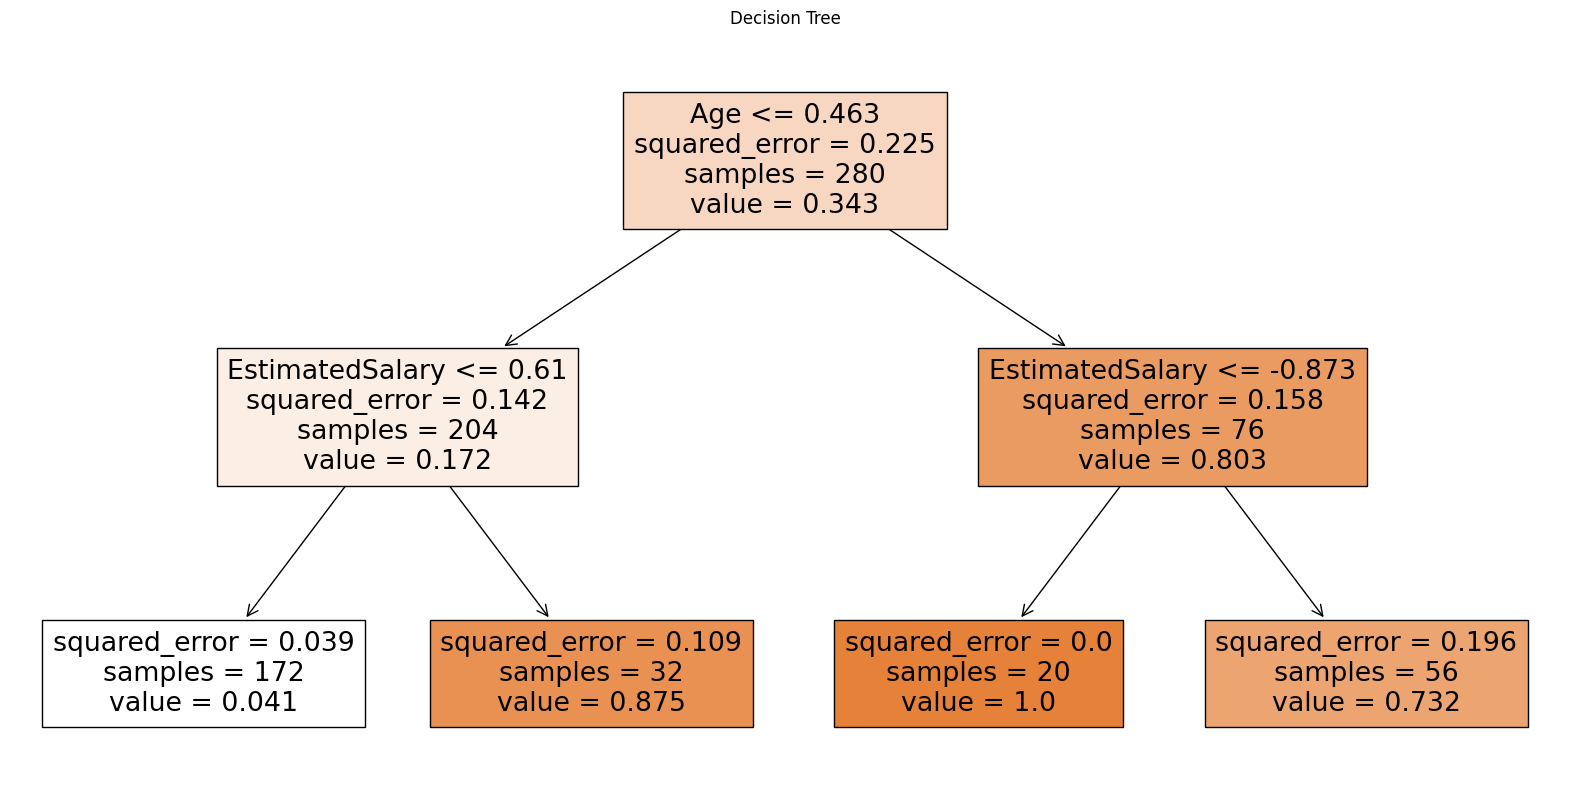

In [27]:
plt.figure(figsize=(20,10))
plot_tree(underfit_model, filled=True, feature_names=['Age', 'EstimatedSalary'], class_names=['Not Purchased', 'Purchased'])
plt.title("Decision Tree")
plt.show()

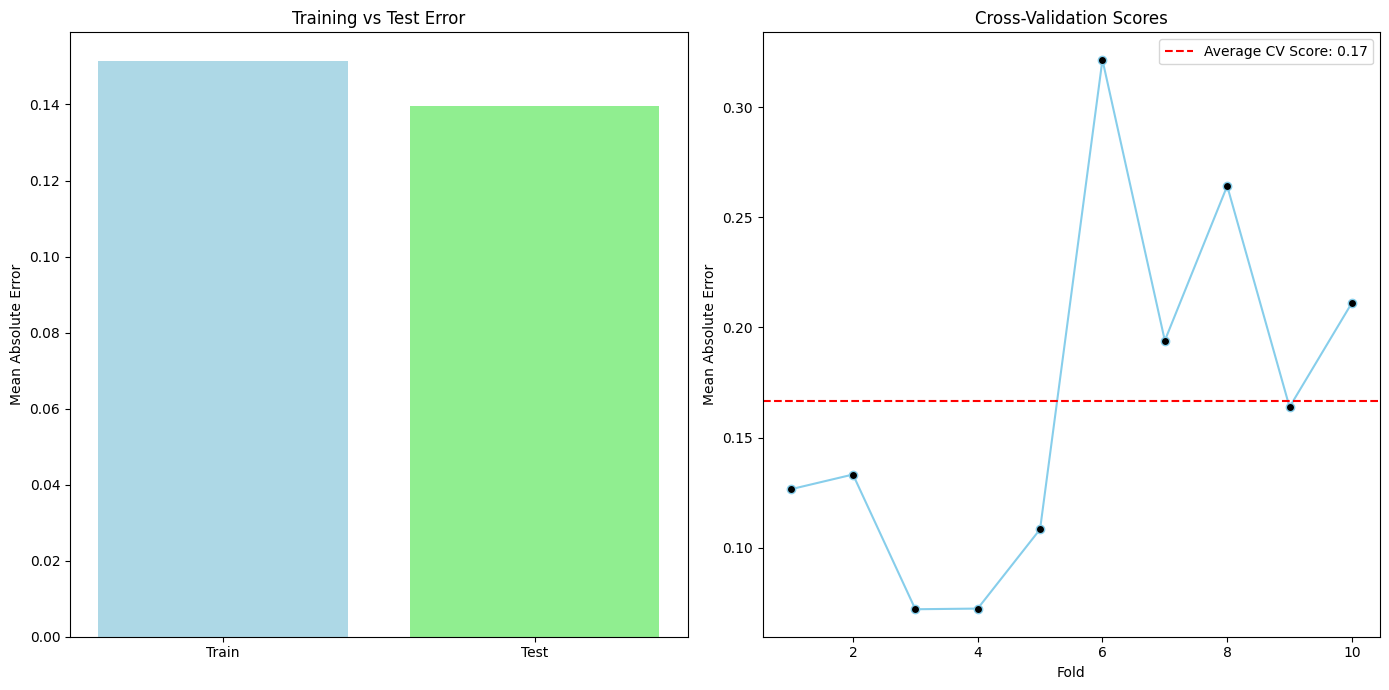

In [28]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.bar(['Train', 'Test'], [mae_train, mae_test], color=['lightblue', 'lightgreen'])
plt.ylabel('Mean Absolute Error')
plt.title('Training vs Test Error')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='skyblue', markerfacecolor='black')
plt.xlabel('Fold')
plt.ylabel('Mean Absolute Error')
plt.title('Cross-Validation Scores')
plt.axhline(y=np.mean(cv_scores), color='r', linestyle='--', label=f'Average CV Score: {np.mean(cv_scores):.2f}')
plt.legend()

plt.tight_layout()
plt.show()